# Two-Population DTD

Comparing the parameterization in Matteucci et al. (2006) to the simpler form in our paper.

$$
\log {\rm DTD}(t) = 1.4 - 50(\log t - 7.7)^2
$$
for $t < 10^{7.93}$ years, and
$$
\log {\rm DTD}(t) = -0.8 - 0.9(\log t - 8.7)^2
$$
for $t > 10^{7.93}$ years

In [1]:
import math as m

class TwoPopulationM06:
    def __init__(self):
        self.tsplit = 10 ** -1.07
        
    def __call__(self, time):
        tyr = time * 1e9
        if time < self.tsplit:
            return 10 ** (1.4 - 50 * (m.log10(tyr) - 7.7)**2)
        else:
            return 10 ** (-0.8 - 0.9 * (m.log10(tyr) - 8.7)**2)

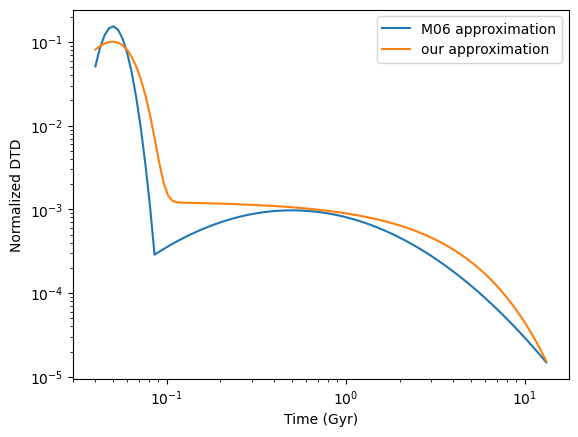

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('../src/scripts'))
from multizone.src.dtds import prompt

tarr = np.logspace(np.log10(0.04), np.log10(13.2), 100)
twopop_m06 = TwoPopulationM06()
m06_norm = np.array([twopop_m06(t) for t in tarr])
m06_norm /= m06_norm.sum()
plt.loglog(tarr, m06_norm, label='M06 approximation')
twopop_simple = prompt()
simple_norm = np.array([twopop_simple(t) for t in tarr])
simple_norm /= simple_norm.sum()
plt.plot(tarr, simple_norm, label='our approximation')
plt.xlabel('Time (Gyr)')
plt.ylabel('Normalized DTD')
plt.legend()
plt.show()

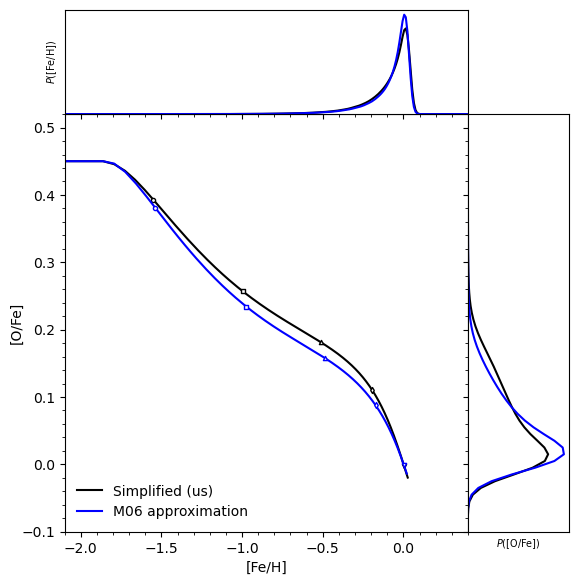

In [7]:
from track_and_mdf import setup_figure, plot_vice_onezone
from _globals import END_TIME, ONEZONE_DEFAULTS
import vice
from multizone.src.yields import J21
from multizone.src import models
import paths

output_dir = paths.data / 'onezone' / 'two_population_dtd'
if not output_dir.exists():
    output_dir.mkdir(parents=True)

fig, axs = setup_figure(width=6)

dt = ONEZONE_DEFAULTS['dt']
simtime = np.arange(0, END_TIME + dt, dt)

delay = ONEZONE_DEFAULTS['delay']
distributions = [prompt(), TwoPopulationM06()]
names = ['simple', 'm06']
labels = ['Simplified (us)', 'M06 approximation']
colors = ['k', 'b']

for i, dtd in enumerate(distributions):
    sz = vice.singlezone(name=str(output_dir / names[i]),
                         RIa=dtd,
                         func=models.insideout(8, dt=dt), 
                         mode='sfr',
                         **ONEZONE_DEFAULTS)
    sz.run(simtime, overwrite=True)
    plot_vice_onezone(str(output_dir / names[i]), 
                      fig=fig, axs=axs,
                      label=labels[i], 
                      color=colors[i],
                      linestyle='-',
                      marker_labels=False,
                      )

# Re-scale marginal axis limits
axs[1].set_ylim(bottom=0)
axs[2].set_xlim(left=0)

axs[0].legend(frameon=False, loc='lower left', handlelength=1.8)
plt.show()